**1. Imports & Load Everything**

In [1]:
import shap
import pandas as pd
import joblib


In [2]:
model = joblib.load("/content/model.pkl")
encoders = joblib.load("/content/encoders.pkl")

df = pd.read_csv("/content/insurance_dataset.csv")

**2. Encode Categorical Columns**

In [3]:
for col in encoders:
    df[col] = encoders[col].transform(df[col])


**3. Prepare Feature Matrix**

In [4]:
X = df.drop("annual_premium", axis=1)


**4. SHAP Explainer**

In [5]:
explainer = shap.Explainer(model)
shap_values = explainer(X)


**5. Global Feature Importance**

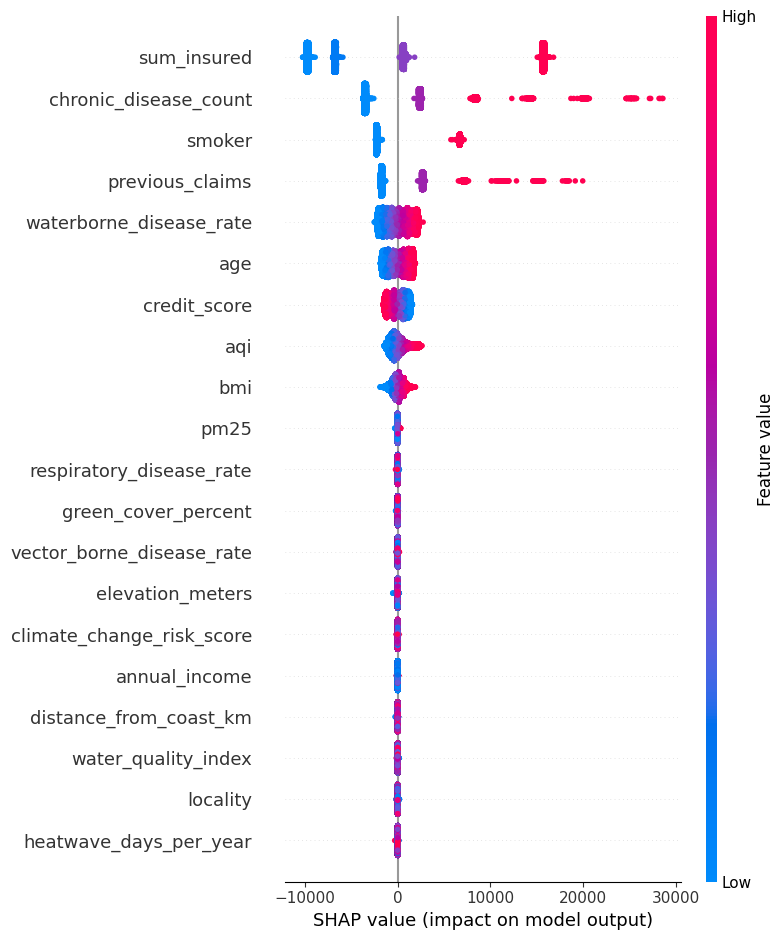

In [6]:
shap.summary_plot(shap_values, X)


**6. Bar Plot (Mean Absolute SHAP)**

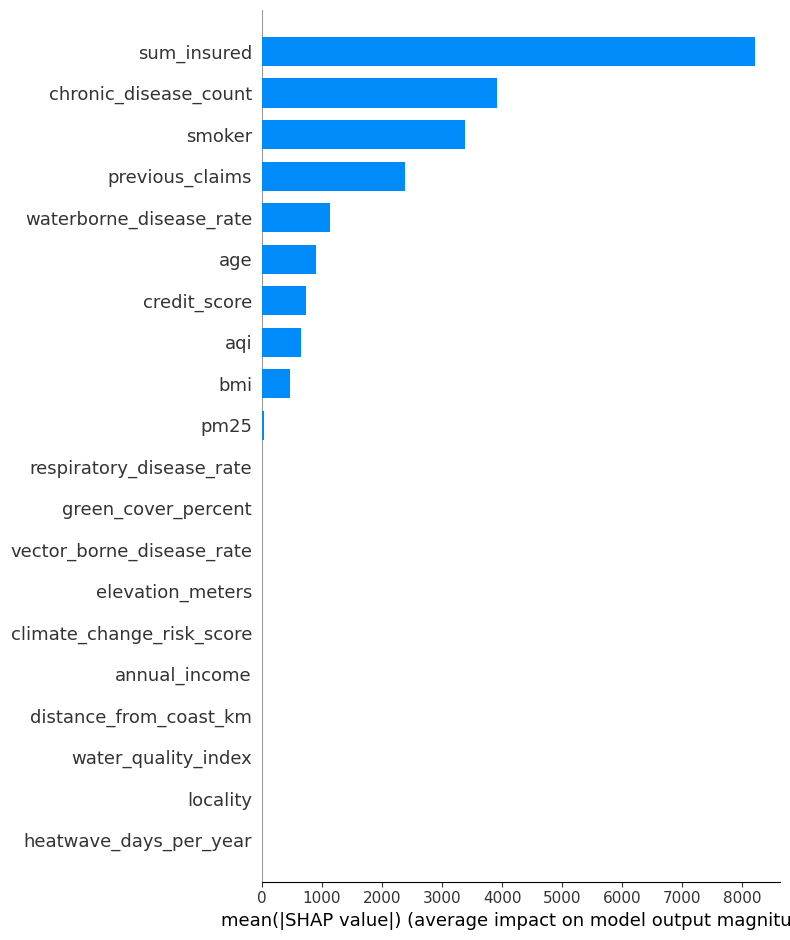

In [7]:
shap.summary_plot(shap_values, X, plot_type="bar")


**7. Individual Prediction Explanation**

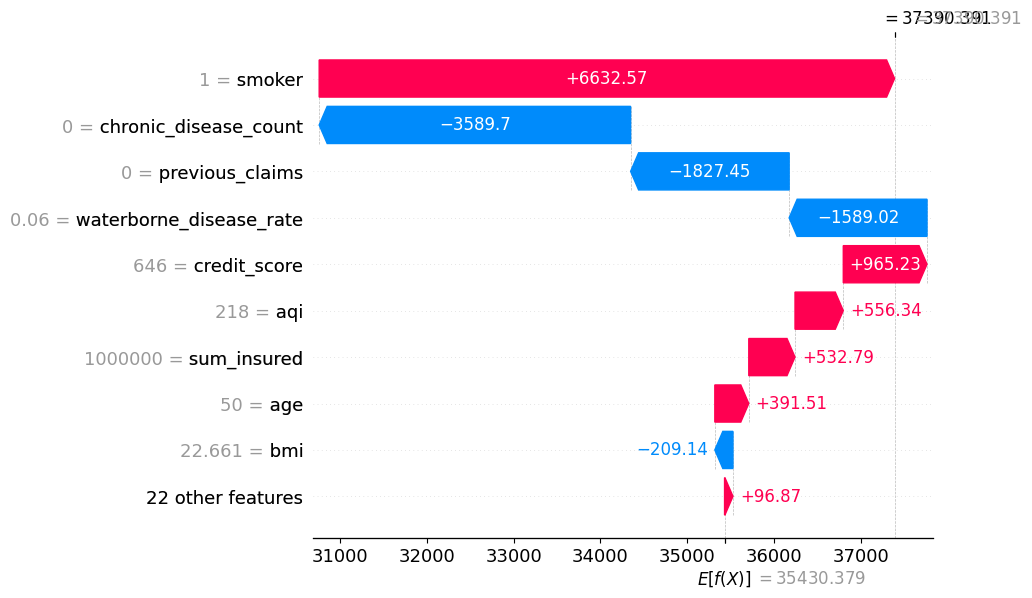

In [8]:
index = 10  # any sample
shap.plots.waterfall(shap_values[index])


**8. Dependence Plots (Key Risk Drivers)**

**AQI Impact**

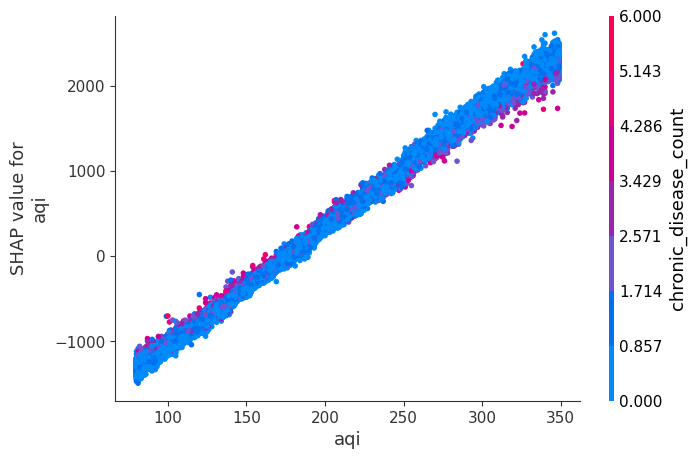

In [9]:
shap.dependence_plot("aqi", shap_values.values, X)


**Flood Risk Impact**

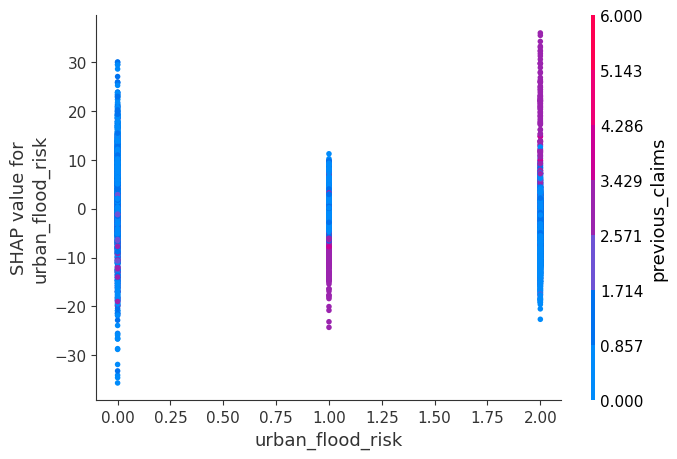

In [10]:
shap.dependence_plot("urban_flood_risk", shap_values.values, X)


**Green Cover (Risk Reduction)**

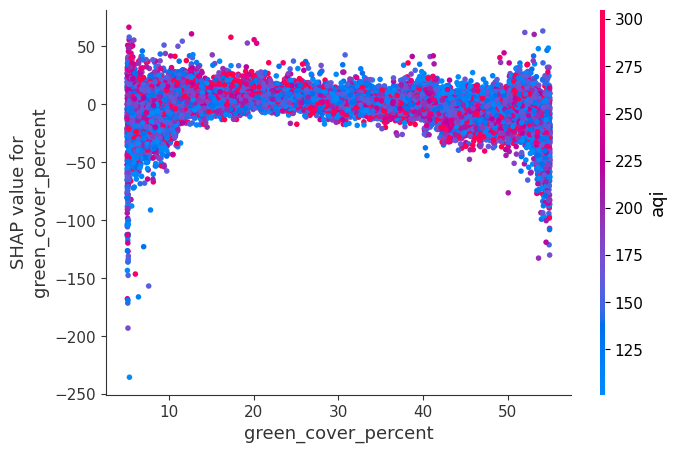

In [11]:
shap.dependence_plot("green_cover_percent", shap_values.values, X)
